<a href="https://colab.research.google.com/github/jshivamds272/Data-science-projects/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Import

In [ ]:
import pandas as pd
import plotly.express as px
from  fbprophet import Prophet  

In [ ]:
df=pd.read_csv('/content/TSLA.csv') #import dataset

In [ ]:
df.info()  #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()  #statistical information about dataset

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [ ]:
df.isnull().sum()   #checked how many null values are there

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data visualisation

In [ ]:
px.area(df,x='Date',y='Close')     #visualised date and close price

In [ ]:
px.line(df,x='Date',y='Close')

In [ ]:
px.area(df,x='Date',y='Volume') #visualised all volumes of share each day

In [ ]:
px.bar(df,y='Volume')

In [ ]:
px.box(df,y='Close')

Facebook Prophet
Accurate and fast- it is accurate and generate results very fast
Reliable-Facebook company itself uses Prophet for internal forecasting]
Fully Automatic-Works with missing data and no need to perform extensive data preprocessing
Domain Knowladge integraton- Forecasting can be made better by adding domain knowladge expertise like holidays and patterns
Available In r and Python

In [ ]:
ndf=pd.DataFrame(df,columns=['Date','Close'])

In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

Creating facebook Prophet Model


In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.535181,-29.091806,149.004312,65.535181,65.535181,-5.874279,-5.874279,-5.874279,-5.874279,-5.874279,-5.874279,0.0,0.0,0.0,59.660903
1,2020-03-17,67.330702,-26.716420,141.300615,67.330702,67.330702,-2.414034,-2.414034,-2.414034,-2.414034,-2.414034,-2.414034,0.0,0.0,0.0,64.916667
2,2020-03-18,69.126222,-21.251665,152.554293,69.126222,69.126222,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,0.0,0.0,0.0,65.618732
3,2020-03-19,70.921742,-20.809893,151.784137,70.921742,70.921742,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,0.0,0.0,0.0,67.066107
4,2020-03-20,72.717262,-14.026256,154.497403,72.717262,72.717262,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,0.0,0.0,0.0,64.955877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.335687,808.834263,988.570959,899.070148,901.363159,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,-3.507490,0.0,0.0,0.0,896.828198
277,2021-04-08,902.793204,814.179187,982.026914,901.432074,903.887283,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,-3.855635,0.0,0.0,0.0,898.937569
278,2021-04-09,905.250720,820.039664,988.900934,903.803250,906.394056,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,-7.761385,0.0,0.0,0.0,897.489335
279,2021-04-10,907.708236,831.544542,1002.975531,906.164639,908.915284,11.706412,11.706412,11.706412,11.706412,11.706412,11.706412,0.0,0.0,0.0,919.414648


In [ ]:
px.line(forecast,x='ds',y='yhat')

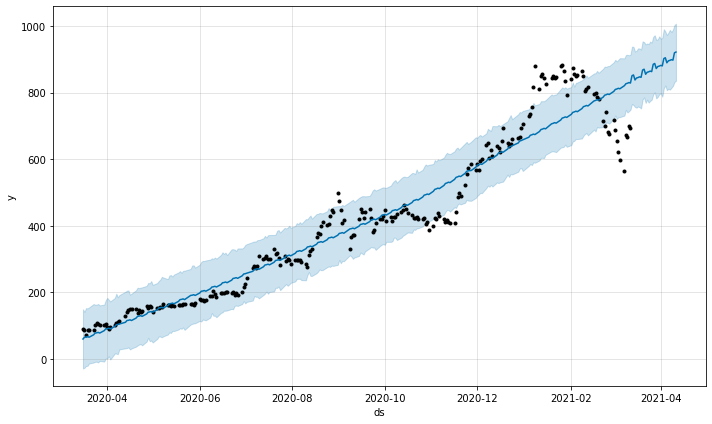

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

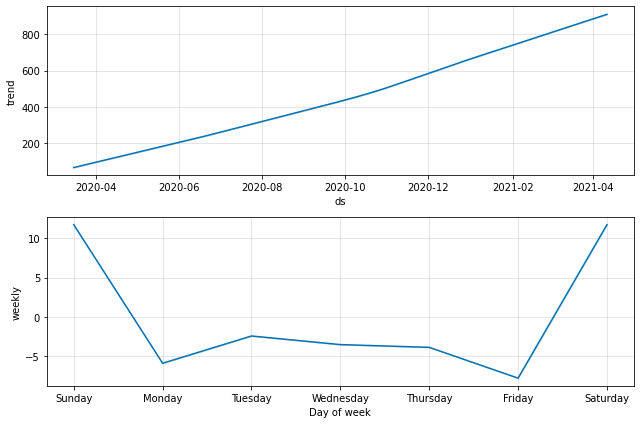

In [ ]:
figure=m.plot_components(forecast)

Download and Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>